In [ ]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [ ]:
#Loading data into dataframes
character_df = pd.read_csv("fixed_characters.csv") #Do we need encoding ="latin-1"?
lines_df = pd.read_csv("fixed_lines.csv", encoding ="latin-1") 


In [ ]:
lines_df

,Unnamed: 0,lineId,chId,mId,chName,dialogue
0,0,L1045,u0,m0,BIANCA,They do not
1,1,L1044,u2,m0,CAMERON,They do to
2,2,L985,u0,m0,BIANCA,I hope so
3,3,L984,u2,m0,CAMERON,She okay
4,4,L925,u0,m0,BIANCA,Let's go
...,...,...,...,...,...,...
292938,293197,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
292939,293198,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
292940,293199,L666369,u9030,m616,DURNFORD,Your orders Mr Vereker
292941,293200,L666257,u9030,m616,DURNFORD,Good ones yes Mr Vereker Gentlemen who can rid...


In [ ]:
character_df.head()

,id,name,movie_id,title,gender,credit_position
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,M,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,F,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [ ]:
character_df.name = character_df.name.str.lower()
character_df

,id,name,movie_id,title,gender,credit_position
0,u0,bianca,m0,10 things i hate about you,f,4
1,u1,bruce,m0,10 things i hate about you,M,?
2,u2,cameron,m0,10 things i hate about you,m,3
3,u3,chastity,m0,10 things i hate about you,F,?
4,u4,joey,m0,10 things i hate about you,m,6
...,...,...,...,...,...,...
9029,u9030,durnford,m616,zulu dawn,?,?
9030,u9031,melvill,m616,zulu dawn,?,?
9031,u9032,norris-newman,m616,zulu dawn,M,?
9032,u9033,stuart smith,m616,zulu dawn,?,?


In [ ]:
def reset_tabs(row):
  character_id = row['id']
  name = row['name']
  movie_id = row['movie_id']
  title = row['title']
  gender = row['gender']
  credit_position = row['credit_position']
  if '\t' in character_id:
    lst = character_id.split('\t')
    character_id = lst[0]
    name = lst[1]
    movie_id = lst[2]
    title = lst[3]
    gender = lst[4]
    credit_position = lst[5]
    print(character_id)
  series = pd.Series([character_id, name, movie_id, title, gender, credit_position])
  return series

In [ ]:
character_df = character_df.apply(reset_tabs, axis=1)

u1602
u1866
u4660
u4664
u5011
u6736
u6737
u6738
u6739
u6740
u6741
u6742
u6743
u7230
u7845
u7914
u7917


In [ ]:
character_df
character_df[character_df[1].isnull()]
character_df.dropna()

,0,1,2,3,4,5
0,u0,bianca,m0,10 things i hate about you,f,4
1,u1,bruce,m0,10 things i hate about you,M,?
2,u2,cameron,m0,10 things i hate about you,m,3
3,u3,chastity,m0,10 things i hate about you,F,?
4,u4,joey,m0,10 things i hate about you,m,6
...,...,...,...,...,...,...
9029,u9030,durnford,m616,zulu dawn,?,?
9030,u9031,melvill,m616,zulu dawn,?,?
9031,u9032,norris-newman,m616,zulu dawn,M,?
9032,u9033,stuart smith,m616,zulu dawn,?,?


In [ ]:
character_df = character_df.rename(columns={
    0: 'id',
    1: 'name',
    2: 'movie_id',
    3: 'title',
    4: 'gender',
    5: 'credit_position'
})

character_df

,id,name,movie_id,title,gender,credit_position
0,u0,bianca,m0,10 things i hate about you,f,4
1,u1,bruce,m0,10 things i hate about you,M,?
2,u2,cameron,m0,10 things i hate about you,m,3
3,u3,chastity,m0,10 things i hate about you,F,?
4,u4,joey,m0,10 things i hate about you,m,6
...,...,...,...,...,...,...
9029,u9030,durnford,m616,zulu dawn,?,?
9030,u9031,melvill,m616,zulu dawn,?,?
9031,u9032,norris-newman,m616,zulu dawn,M,?
9032,u9033,stuart smith,m616,zulu dawn,?,?


In [ ]:
character_df['gender'].value_counts()

M    2456
?    2418
m    1899
F    1340
f     921
Name: gender, dtype: int64

In [ ]:
character_df.dtypes

id                 object
name               object
movie_id           object
title              object
gender             object
credit_position    object
dtype: object

In [ ]:
character_df['gender'][character_df.gender == '?'] = "N"

In [ ]:
character_df['gender'].value_counts()

M    2456
N    2418
m    1899
F    1340
f     921
Name: gender, dtype: int64

In [ ]:
character_df['gender'] = character_df['gender'].str.upper()

In [ ]:
character_df = character_df.rename(columns={
   'id': 'chid',
})
character_df

,chid,name,movie_id,title,gender,credit_position
0,u0,bianca,m0,10 things i hate about you,F,4
1,u1,bruce,m0,10 things i hate about you,M,?
2,u2,cameron,m0,10 things i hate about you,M,3
3,u3,chastity,m0,10 things i hate about you,F,?
4,u4,joey,m0,10 things i hate about you,M,6
...,...,...,...,...,...,...
9029,u9030,durnford,m616,zulu dawn,N,?
9030,u9031,melvill,m616,zulu dawn,N,?
9031,u9032,norris-newman,m616,zulu dawn,M,?
9032,u9033,stuart smith,m616,zulu dawn,N,?


In [ ]:
gender_count = character_df['gender'].value_counts()
gender_count

M    4355
N    2418
F    2261
Name: gender, dtype: int64

In [ ]:
#Cleaning all of the hyphens out of the dialogue
newlines_df = lines_df
newlines_df['dialogue'] = newlines_df['dialogue'].replace('-', ' ', regex=True).astype(str)
newlines_df

,Unnamed: 0,lineId,chId,mId,chName,dialogue
0,0,L1045,u0,m0,BIANCA,They do not
1,1,L1044,u2,m0,CAMERON,They do to
2,2,L985,u0,m0,BIANCA,I hope so
3,3,L984,u2,m0,CAMERON,She okay
4,4,L925,u0,m0,BIANCA,Let's go
...,...,...,...,...,...,...
292938,293197,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
292939,293198,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
292940,293199,L666369,u9030,m616,DURNFORD,Your orders Mr Vereker
292941,293200,L666257,u9030,m616,DURNFORD,Good ones yes Mr Vereker Gentlemen who can rid...


In [ ]:
#Cleaning all of the double hyphens out of the dialogue
newlines_df['dialogue'] = newlines_df['dialogue'].replace('--', ' ', regex=True).astype(str)
newlines_df

,Unnamed: 0,lineId,chId,mId,chName,dialogue
0,0,L1045,u0,m0,BIANCA,They do not
1,1,L1044,u2,m0,CAMERON,They do to
2,2,L985,u0,m0,BIANCA,I hope so
3,3,L984,u2,m0,CAMERON,She okay
4,4,L925,u0,m0,BIANCA,Let's go
...,...,...,...,...,...,...
292938,293197,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
292939,293198,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
292940,293199,L666369,u9030,m616,DURNFORD,Your orders Mr Vereker
292941,293200,L666257,u9030,m616,DURNFORD,Good ones yes Mr Vereker Gentlemen who can rid...


In [ ]:
# testing to see if they were replaced
newlines_df['dialogue'].str.findall('--').value_counts

<bound method IndexOpsMixin.value_counts of 0         []
1         []
2         []
3         []
4         []
          ..
292938    []
292939    []
292940    []
292941    []
292942    []
Name: dialogue, Length: 292943, dtype: object>

In [ ]:
newlines_df = newlines_df[['lineId', 'chId', 'mId', 'chName', 'dialogue']]
newlines_df

,lineId,chId,mId,chName,dialogue
0,L1045,u0,m0,BIANCA,They do not
1,L1044,u2,m0,CAMERON,They do to
2,L985,u0,m0,BIANCA,I hope so
3,L984,u2,m0,CAMERON,She okay
4,L925,u0,m0,BIANCA,Let's go
...,...,...,...,...,...
292938,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
292939,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
292940,L666369,u9030,m616,DURNFORD,Your orders Mr Vereker
292941,L666257,u9030,m616,DURNFORD,Good ones yes Mr Vereker Gentlemen who can rid...


In [ ]:
newlines_df = newlines_df.rename(columns={
   'chId': 'chid',
})
newlines_df

,lineId,chid,mId,chName,dialogue
0,L1045,u0,m0,BIANCA,They do not
1,L1044,u2,m0,CAMERON,They do to
2,L985,u0,m0,BIANCA,I hope so
3,L984,u2,m0,CAMERON,She okay
4,L925,u0,m0,BIANCA,Let's go
...,...,...,...,...,...
292938,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
292939,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
292940,L666369,u9030,m616,DURNFORD,Your orders Mr Vereker
292941,L666257,u9030,m616,DURNFORD,Good ones yes Mr Vereker Gentlemen who can rid...


In [ ]:
#Merge the datasets so that every line has a gender associated with it
characterline_df = newlines_df.merge(character_df, on='chid', how='left')
characterline_df.head()

,lineId,chid,mId,chName,dialogue,name,movie_id,title,gender,credit_position
0,L1045,u0,m0,BIANCA,They do not,bianca,m0,10 things i hate about you,F,4
1,L1044,u2,m0,CAMERON,They do to,cameron,m0,10 things i hate about you,M,3
2,L985,u0,m0,BIANCA,I hope so,bianca,m0,10 things i hate about you,F,4
3,L984,u2,m0,CAMERON,She okay,cameron,m0,10 things i hate about you,M,3
4,L925,u0,m0,BIANCA,Let's go,bianca,m0,10 things i hate about you,F,4


In [ ]:
slim_df = characterline_df[['dialogue', 'gender']]
slim_df['dialogue'] = slim_df['dialogue'].apply(lambda x: x.lower())
slim_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dialogue,gender
0,they do not,F
1,they do to,M
2,i hope so,F
3,she okay,M
4,let's go,F
...,...,...
292938,lord chelmsford seems to want me to stay back ...,N
292939,i'm to take the sikali with the main column to...,N
292940,your orders mr vereker,N
292941,good ones yes mr vereker gentlemen who can rid...,N


In [ ]:
slim_df.gender.fillna('N', inplace =True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
slim_df.gender.isna().sum()

0

In [ ]:
# slim_df.gender = [ 1 if each == 'f' elif each == 'M'{ slim_df.gender = 2} else 0 for each data.gender]
slim_df['gender'] = slim_df['gender'].replace('M', 0, regex=True)
slim_df['gender'] = slim_df['gender'].replace('F', 1, regex=True)
slim_df['gender'] = slim_df['gender'].replace('N', 2, regex=True)
slim_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,dialogue,gender
0,they do not,1
1,they do to,0
2,i hope so,1
3,she okay,0
4,let's go,1
...,...,...
292938,lord chelmsford seems to want me to stay back ...,2
292939,i'm to take the sikali with the main column to...,2
292940,your orders mr vereker,2
292941,good ones yes mr vereker gentlemen who can rid...,2


In [ ]:
# slim_df['gender'] = slim_df['gender'].astype(int)
slim_df.dtypes

dialogue    object
gender       int64
dtype: object

In [ ]:
slim_df.gender.value_counts().values

array([187727,  82221,  22995])

In [ ]:
slim_df.gender.value_counts().values[0]/slim_df.gender.value_counts().values[1]

2.28320015567799

In [ ]:
characterline_df['name'].nunique()

5231

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
type(stopwords.words('english'))

list

In [ ]:
sw = stopwords.words('english')
names = character_df['name']
names = names.to_list()

sw.extend(names)
print(sw)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
type(sw)

list

In [ ]:
characterline_df = characterline_df.dropna()

In [ ]:
characterline_df.name.isna().sum()

0

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text = slim_df['dialogue'][292938]

text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in sw]

print(tokens_without_sw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['lord', 'seems', 'want', 'stay', 'back', 'basutos']


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

words = [porter_stemmer.stem(word) for word in tokens_without_sw]


In [ ]:
words

['lord', 'seem', 'want', 'stay', 'back', 'basuto']

In [ ]:
#Split data into training and testing 

#Tokenize the gender column into numbers



set

In [ ]:
text = slim_df.dialogue.values
stopwords
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

TypeError: ignored

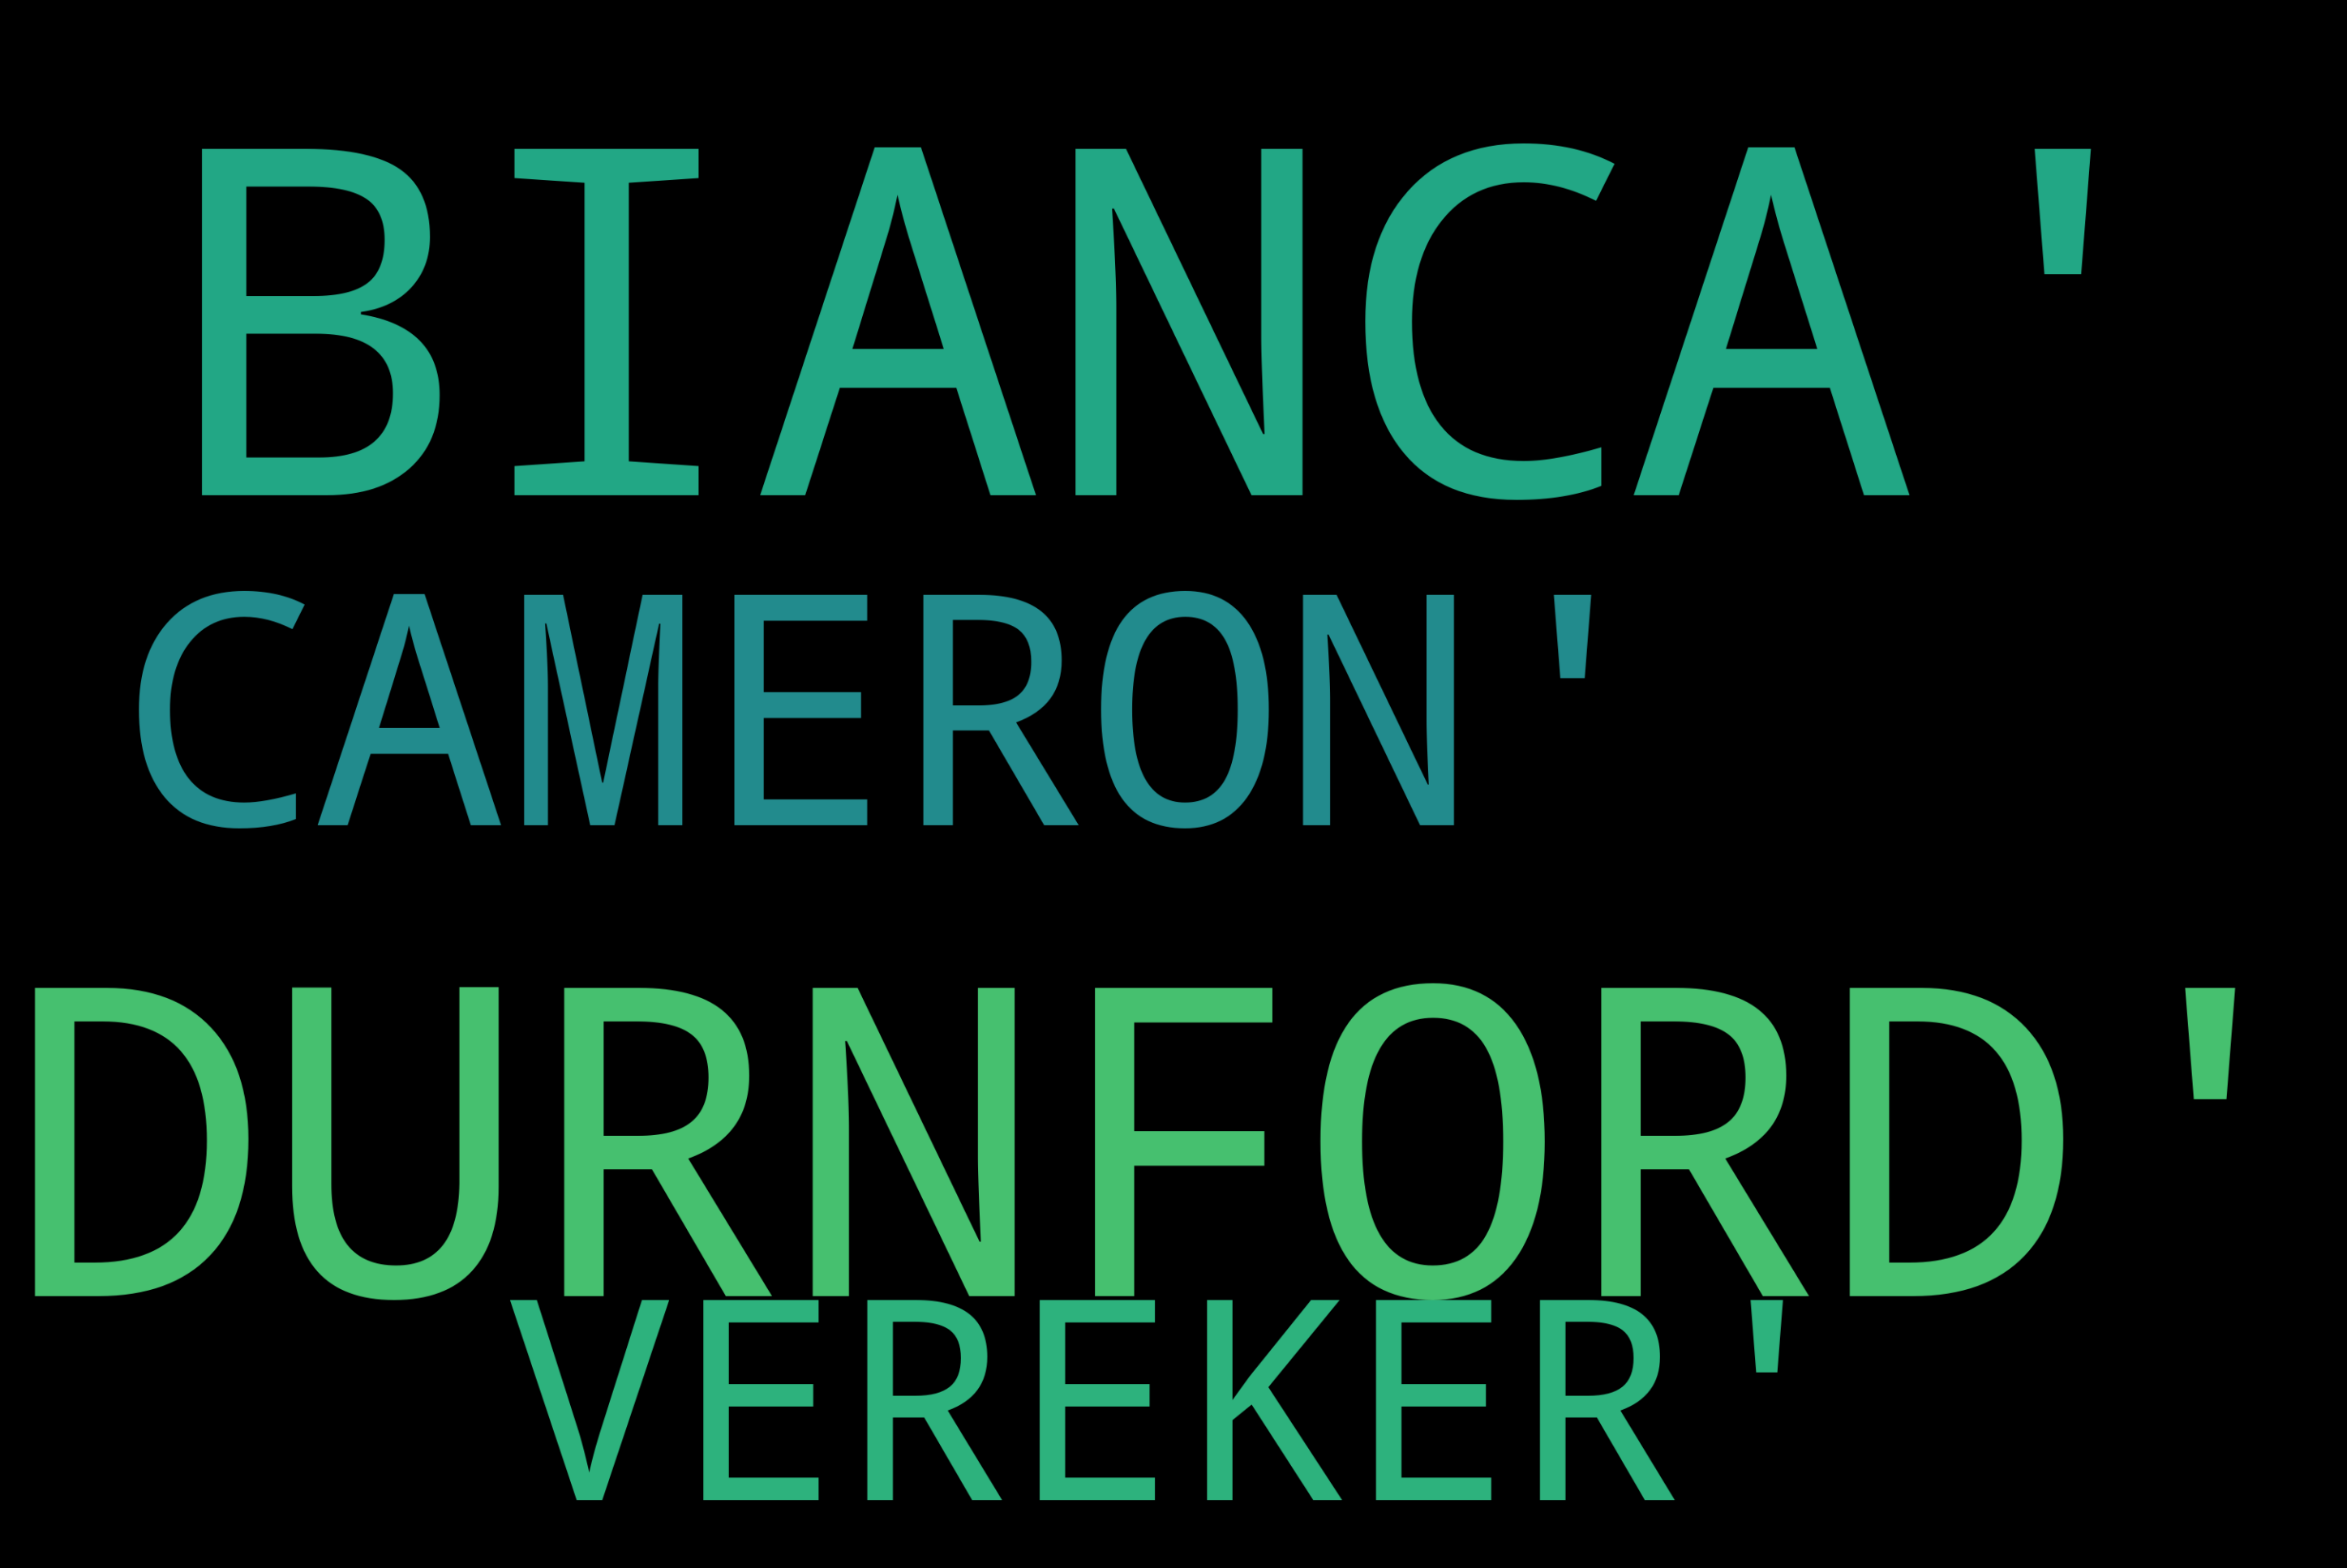

In [ ]:

text = characterline_df.name.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()